# Decision Tree

## Import Modules

In [22]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

import graphviz #之前安装一直不成功，尝试‘conda install -c anaconda graphviz’ and ‘pip install graphviz’
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, export_graphviz

## Decision Trees

sklearn.tree.DecisionTreeClassifier(criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)

具体参数介绍看个人主页“http://github.com/lddyato”

In [33]:
iris = load_iris()

In [35]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [36]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [38]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 3)
clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.97


In [73]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [61]:
clf.feature_importances_

array([ 0.00670338,  0.01787567,  0.54643762,  0.42898334])

##  Setting max decision tree depth to help avoid overfitting

In [74]:
clf2 = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)
clf2

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [75]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.98
Accuracy of Decision Tree classifier on test set: 0.92


## Visualizing decision trees

In [57]:
def plot_decision_tree(clf, feature_names, class_names):
    # This function requires the pydotplus module and assumes it's been installed.
    # In some cases (typically under Windows) even after running conda install, there is a problem where the
    # pydotplus module is not found when running from within the notebook environment.  The following code
    # may help to guarantee the module is installed in the current notebook environment directory.
    #
    # import sys; sys.executable
    # !{sys.executable} -m pip install pydotplus

    export_graphviz(clf, out_file="adspy_temp.dot", feature_names=feature_names, class_names=class_names, filled = True, impurity = False)
    with open("adspy_temp.dot") as f:
        dot_graph = f.read()
    # Alternate method using pydotplus, if installed.
    # graph = pydotplus.graphviz.graph_from_dot_data(dot_graph)
    # return graph.create_png()
    return graphviz.Source(dot_graph)

In [50]:
# 添加到环境变量路径
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [51]:
export_graphviz(clf, out_file="iris.dot", feature_names=iris.feature_names, class_names=iris.target_names, filled = True, impurity = False)

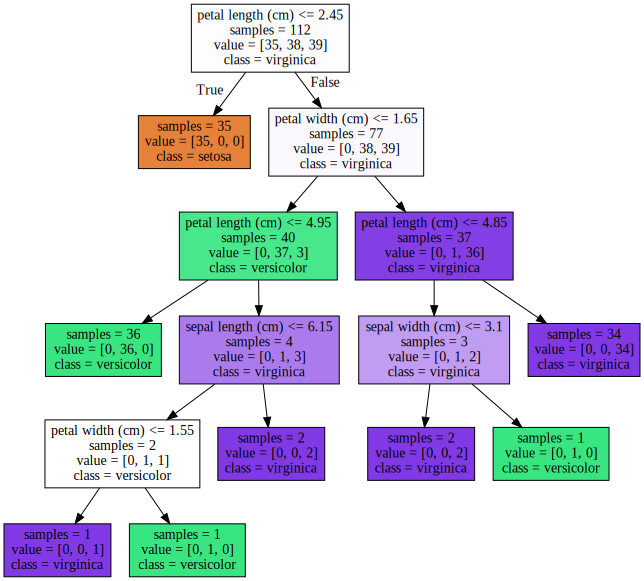

In [52]:
with open("iris.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)    # 之前总是出错，后将'C:/Program Files (x86)/Graphviz2.38/bin/'添加到环境路径里就好了
# 显示决策树的方法之一是，将生成的iris.dot里面的内容copy到http://webgraphviz.com/，点击生成图形，就可以看到决策树
# 或者用‘dot -Tpdf iris.dot -o iris.pdf’生成pdf格式的图，但此命令需要在命令行里执行

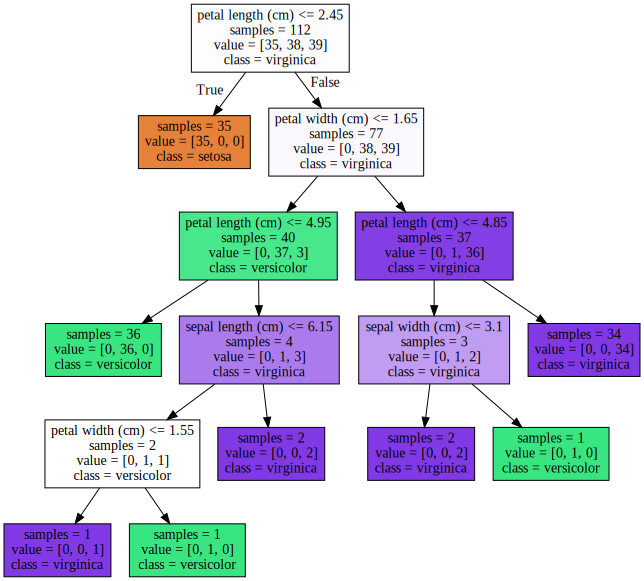

In [54]:
plot_decision_tree(clf, iris.feature_names, iris.target_names)

## Pre-pruned version(max_depth=3)

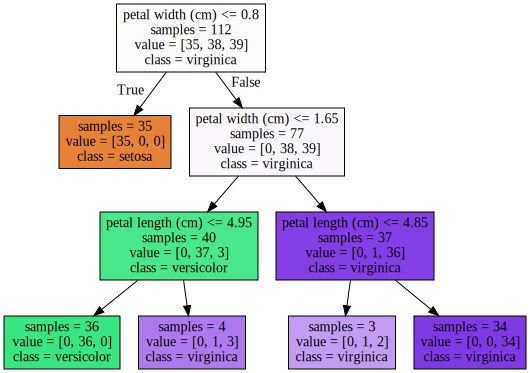

In [55]:
plot_decision_tree(clf2, iris.feature_names, iris.target_names)

## Feature Importance

In [58]:
len(iris.feature_names)

4

In [60]:
range(4)

range(0, 4)

In [18]:
def plot_feature_importances(clf, feature_names):
    c_features = len(feature_names)
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(np.arange(c_features), feature_names)

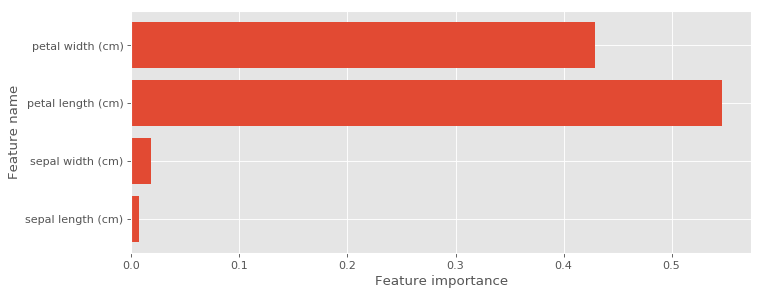

Feature importances: [ 0.00670338  0.01787567  0.54643762  0.42898334]


In [20]:
plt.figure(figsize=(10,4), dpi=80)
plot_feature_importances(clf, iris.feature_names)
plt.show()

print('Feature importances: {}'.format(clf.feature_importances_))

# Cancer Data

In [63]:
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)
X_cancer.shape

(569, 30)

In [65]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'], 
      dtype='<U23')

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf_cancer = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 8,
                            random_state = 0).fit(X_train, y_train)
clf_cancer

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=8,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [67]:
print('Breast cancer dataset: decision tree')
print('Accuracy of DT classifier on training set: {:.2f}'
     .format(clf_cancer.score(X_train, y_train)))
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(clf_cancer.score(X_test, y_test)))

Breast cancer dataset: decision tree
Accuracy of DT classifier on training set: 0.96
Accuracy of DT classifier on test set: 0.94


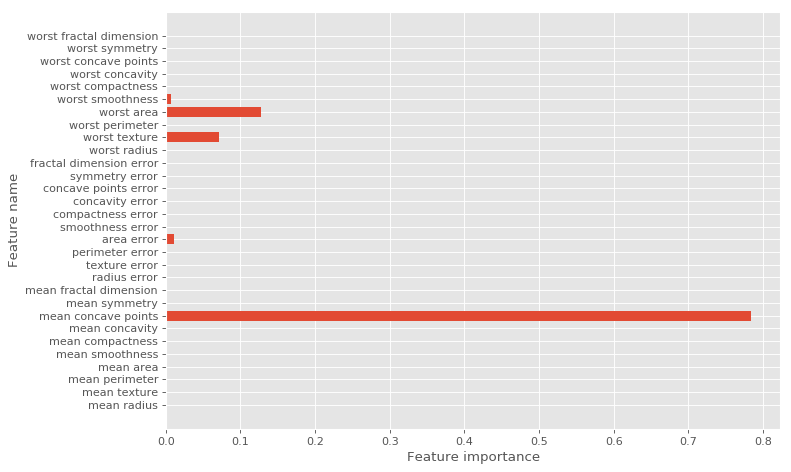

Feature importances: [ 0.          0.          0.          0.          0.          0.          0.
  0.78414739  0.          0.          0.          0.          0.
  0.01120443  0.          0.          0.          0.          0.          0.
  0.          0.07083315  0.          0.12748805  0.00632698  0.          0.
  0.          0.          0.        ]


In [68]:
plt.figure(figsize=(10,6),dpi=80)
plot_feature_importances(clf_cancer, cancer.feature_names)
plt.tight_layout()
plt.show()

print('Feature importances: {}'.format(clf_cancer.feature_importances_))

In [72]:
sorted(list(zip(cancer.feature_names, clf_cancer.feature_importances_)), key=lambda x:x[1], reverse=True)

[('mean concave points', 0.78414738601123168),
 ('worst area', 0.12748804535381023),
 ('worst texture', 0.070833152396792012),
 ('area error', 0.011204432991304686),
 ('worst smoothness', 0.006326983246861261),
 ('mean radius', 0.0),
 ('mean texture', 0.0),
 ('mean perimeter', 0.0),
 ('mean area', 0.0),
 ('mean smoothness', 0.0),
 ('mean compactness', 0.0),
 ('mean concavity', 0.0),
 ('mean symmetry', 0.0),
 ('mean fractal dimension', 0.0),
 ('radius error', 0.0),
 ('texture error', 0.0),
 ('perimeter error', 0.0),
 ('smoothness error', 0.0),
 ('compactness error', 0.0),
 ('concavity error', 0.0),
 ('concave points error', 0.0),
 ('symmetry error', 0.0),
 ('fractal dimension error', 0.0),
 ('worst radius', 0.0),
 ('worst perimeter', 0.0),
 ('worst compactness', 0.0),
 ('worst concavity', 0.0),
 ('worst concave points', 0.0),
 ('worst symmetry', 0.0),
 ('worst fractal dimension', 0.0)]